In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Constants
BLS_API_KEY = "be517799e8a048cb893bde76c44cebdc"  # Replace with your BLS API key
BLS_API_URL = "https://api.bls.gov/publicAPI/v2/timeseries/data/"

# Function to fetch data from BLS API
def fetch_bls_data(series_ids, start_year, end_year):
    headers = {'Content-Type': 'application/json'}
    payload = {
        "seriesid": series_ids,
        "startyear": start_year,
        "endyear": end_year,
        "registrationkey": BLS_API_KEY
    }
    response = requests.post(BLS_API_URL, json=payload, headers=headers)
    data = response.json()
    return data

In [3]:
# Function to process BLS response data
def process_bls_data(data):
    processed_data = {}
    for series in data['Results']['series']:
        series_id = series['seriesID']
        dates = []
        values = []
        for item in series['data']:
            dates.append(f"{item['year']}-{item['periodName']}")
            values.append(float(item['value']))
        processed_data[series_id] = pd.DataFrame({
            'Date': pd.to_datetime(dates, errors='coerce'),
            'Value': values
        })
    return processed_data



In [4]:
# Series IDs for BLS Data
CPI_SERIES_ID = "CUSR0000SA0"  # CPI for All Urban Consumers
EMPLOYMENT_SERIES_ID = "LNS14000000"  # Unemployment Rate

# Fetch Pre-Pandemic Data (2015-2019)
pre_pandemic_data = fetch_bls_data([CPI_SERIES_ID, EMPLOYMENT_SERIES_ID], "2015", "2019")
pre_pandemic_df = process_bls_data(pre_pandemic_data)

# Fetch Post-Pandemic Data (2020-2024)
post_pandemic_data = fetch_bls_data([CPI_SERIES_ID, EMPLOYMENT_SERIES_ID], "2020", "2024")
post_pandemic_df = process_bls_data(post_pandemic_data)


/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_88375/1767186960.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_88375/1767186960.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/ipykernel_88375/1767186960.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  'Date': pd.to_datetime(dates, errors='coerce'),
/var/folders/qx/kwt2yzc57djflb63h7j_sxg40000gn/T/

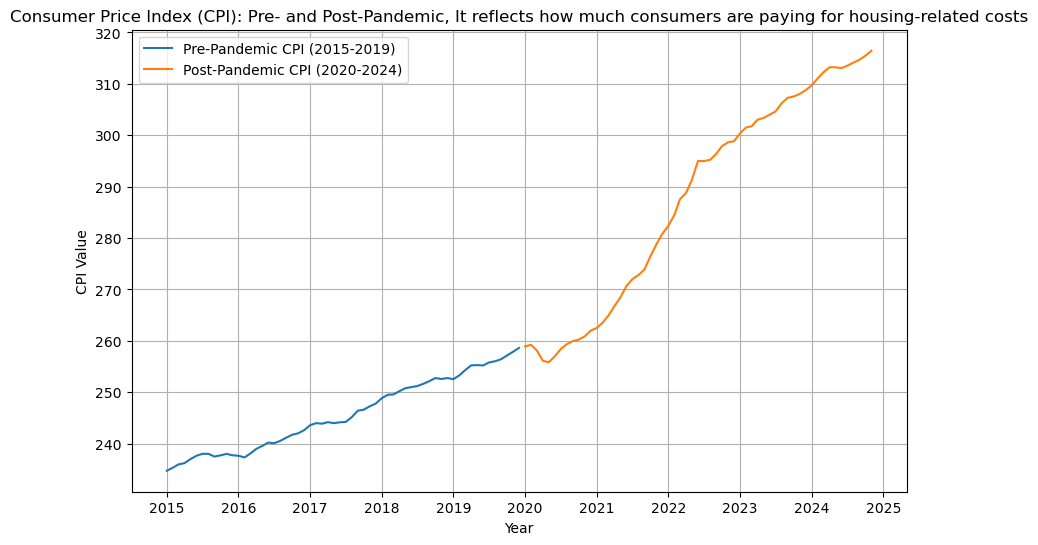

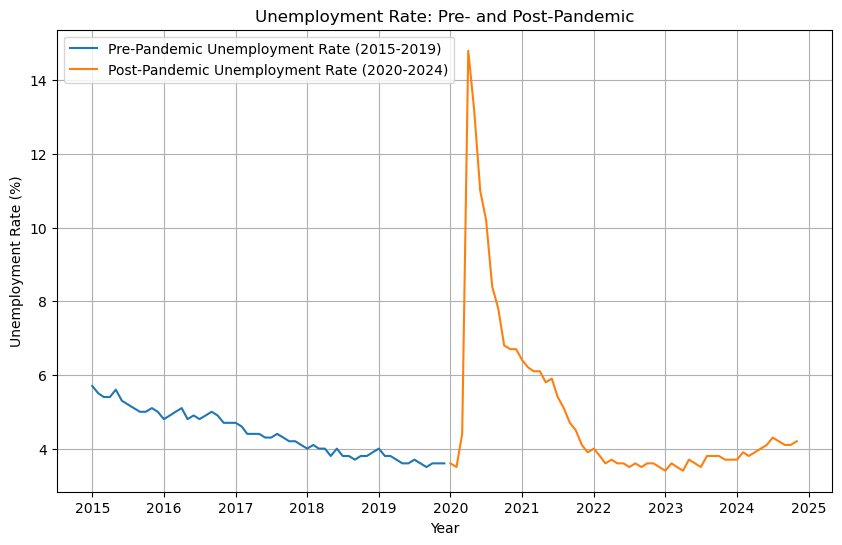

In [5]:

# Plot CPI Data
plt.figure(figsize=(10, 6))
plt.plot(pre_pandemic_df[CPI_SERIES_ID]['Date'], pre_pandemic_df[CPI_SERIES_ID]['Value'], label='Pre-Pandemic CPI (2015-2019)')
plt.plot(post_pandemic_df[CPI_SERIES_ID]['Date'], post_pandemic_df[CPI_SERIES_ID]['Value'], label='Post-Pandemic CPI (2020-2024)')
plt.title("Consumer Price Index (CPI): Pre- and Post-Pandemic, It reflects how much consumers are paying for housing-related costs")
plt.xlabel("Year")
plt.ylabel("CPI Value")
plt.legend()
plt.grid(True)
plt.show()

# Plot Employment Data
plt.figure(figsize=(10, 6))
plt.plot(pre_pandemic_df[EMPLOYMENT_SERIES_ID]['Date'], pre_pandemic_df[EMPLOYMENT_SERIES_ID]['Value'], label='Pre-Pandemic Unemployment Rate (2015-2019)')
plt.plot(post_pandemic_df[EMPLOYMENT_SERIES_ID]['Date'], post_pandemic_df[EMPLOYMENT_SERIES_ID]['Value'], label='Post-Pandemic Unemployment Rate (2020-2024)')
plt.title("Unemployment Rate: Pre- and Post-Pandemic")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate (%)")
plt.legend()
plt.grid(True)
plt.show()
